In [58]:
import numpy as np
import pandas as pd
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Feature scaling
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# CV
from sklearn.model_selection import train_test_split, KFold
# Scores
from sklearn.metrics import recall_score,precision_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Meeting the data

In [59]:
data = pd.read_csv('winequalityN.csv')
data.shape

(6497, 13)

In [60]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
columns = data.columns

In [62]:
print(data['type'].value_counts())

white    4898
red      1599
Name: type, dtype: int64


In [63]:
print(data['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [64]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


# EDA

## Plotting

In [65]:
whites = data[data['type'] == 'white']
reds = data[data['type'] == 'red']
print(whites.shape)
print(reds.shape)

(4898, 13)
(1599, 13)


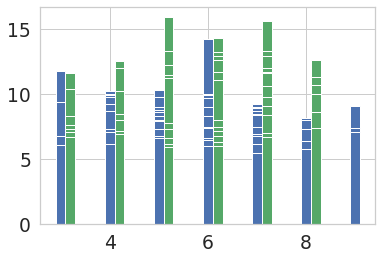

In [66]:
plt.bar(whites['quality'], whites['fixed acidity'], color='b', width=0.2)
plt.bar(reds['quality']+0.2, reds['fixed acidity'], color='g', width=0.2)
plt.show()

Idea for the future: we can use to models separately for reds and whites, if something goes wrong

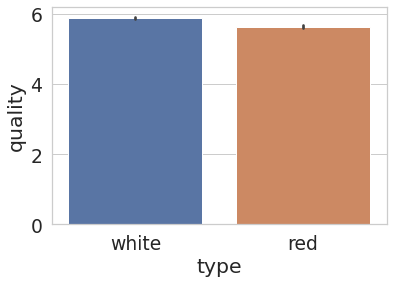

In [67]:
sns.barplot(data['type'], data['quality'])

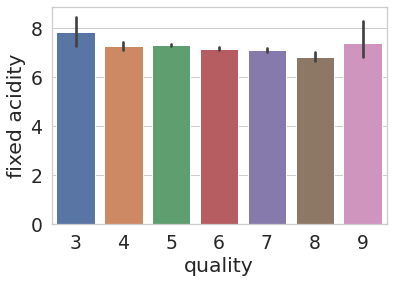

In [68]:
sns.barplot(data['quality'], data['fixed acidity'])

Fixed acidity does not give any specification to classify the quality

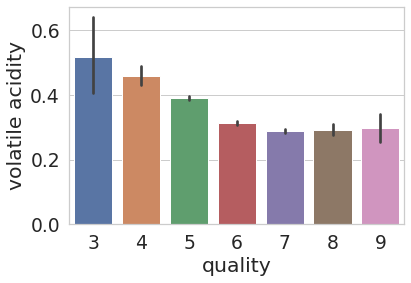

In [69]:
sns.barplot(data['quality'],data['volatile acidity'])

The quality increases when the volatile acidity decreases

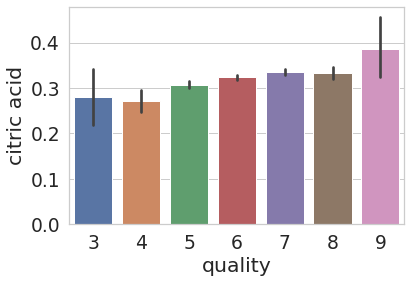

In [70]:
sns.barplot(data['quality'],data['citric acid'])

Quality of the wine increases, when citric acid increases

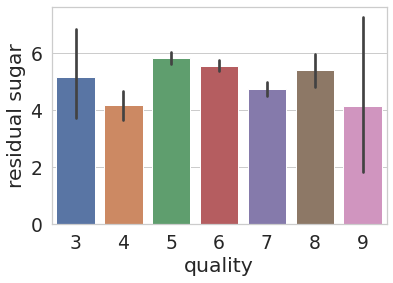

In [71]:
sns.barplot(data['quality'],data['residual sugar'])

There is no conclusion

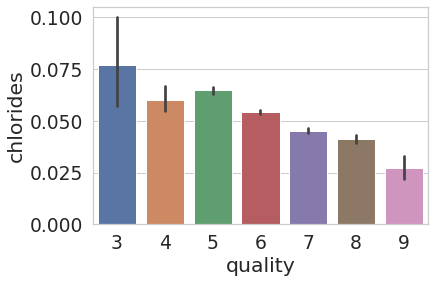

In [72]:
sns.barplot(data['quality'],data['chlorides'])

The quality increases when the volatile acidity decreases

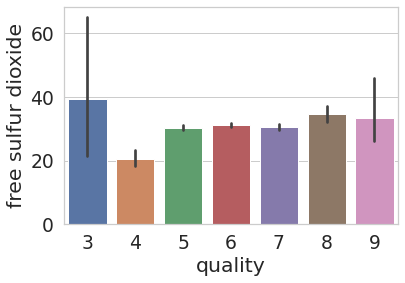

In [73]:
sns.barplot(data['quality'],data['free sulfur dioxide'])

There is no conclusion

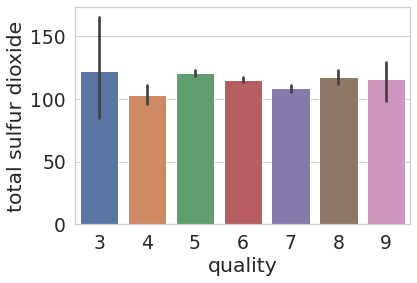

In [74]:
sns.barplot(data['quality'],data['total sulfur dioxide'])

There is no conclusion

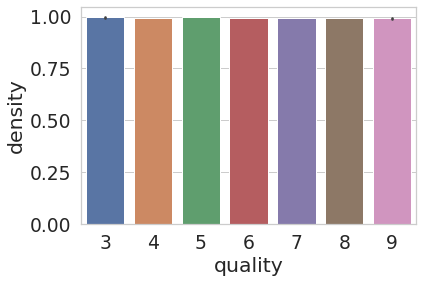

In [75]:
sns.barplot(data['quality'],data['density'])

In [76]:
data['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

We definitely need some feature scaling

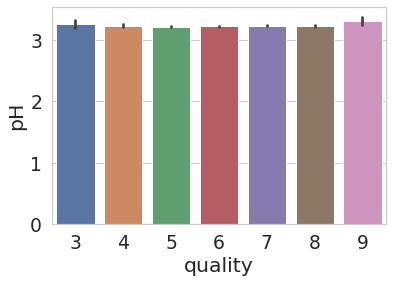

In [77]:
sns.barplot(data['quality'],data['pH'])

Here too

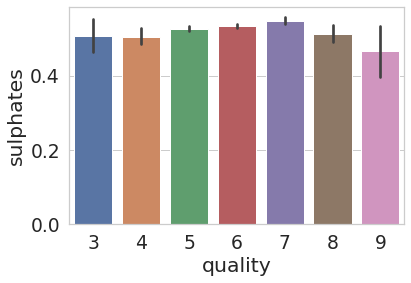

In [78]:
sns.barplot(data['quality'],data['sulphates'])

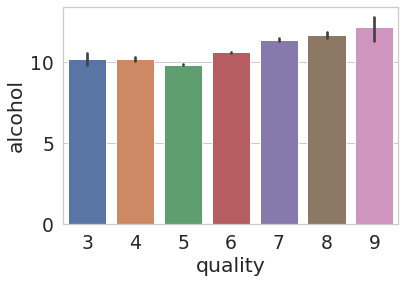

In [79]:
sns.barplot(data['quality'],data['alcohol'])

The quality of wine increases when alcohol level goes higher 

## Feature engineering

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [81]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Բացակայող արժեքների լրացում

In [82]:
def custom_fillna(df, col):
    myu = np.mean(df[col])
    sigma = df[col].std()
    df[col].fillna(myu + sigma * np.random.randn(), inplace=True)

for column in columns:
    if data[column].isnull().sum() > 0:
        custom_fillna(data, column)

In [83]:
Y = data["quality"]
X = data.drop("quality", axis = 1)

One hot encoding of column 'type'

In [84]:
X = pd.get_dummies(data)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


We tried 2 ways of feature scaling: custom class and class from sklearn

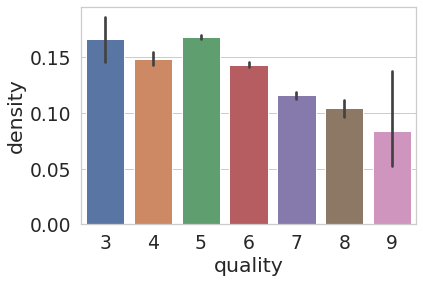

In [85]:
# This class is used only for columns
class CustomScaler:
    def __init__(self):
        self.x_min = None
        self.x_max = None
    
    def fit(self, series):
        self.x_min = series.min()
        self.x_max = series.max()
    
    def transform(self, series):
        series -= self.x_min
        series /= self.x_max - self.x_min
        return self

scaler=CustomScaler()
scaler.fit(data['density'])
scaler.transform(data['density'])
sns.barplot(data['quality'],data['density'])

In [86]:
norm = StandardScaler().fit(X)
X = pd.DataFrame(columns = X.columns, data = norm.transform(X))
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,-0.167641,-0.423590,0.284164,3.206917,-0.314810,0.815565,0.959976,2.102214,-1.358949,-0.542897,-1.418558,0.207999,-0.571367,0.571367
1,-0.707866,-0.241258,0.146443,-0.808182,-0.200638,-0.931107,0.287618,-0.232332,0.504207,-0.274657,-0.831615,0.207999,-0.571367,0.571367
2,0.681285,-0.362813,0.559606,0.305956,-0.172095,-0.029599,-0.331660,0.134525,0.255786,-0.609957,-0.328521,0.207999,-0.571367,0.571367
3,-0.013291,-0.666700,0.008722,0.642299,0.056249,0.928254,1.243074,0.301278,-0.178950,-0.878197,-0.496219,0.207999,-0.571367,0.571367
4,-0.013291,-0.666700,0.008722,0.642299,0.056249,0.928254,1.243074,0.301278,-0.178950,-0.878197,-0.496219,0.207999,-0.571367,0.571367


In [87]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-9.179461e-16,2.336313e-15,-1.249766e-15,-6.441754e-16,3.603056e-17,-5.712086e-16,-8.278911e-16,-4.181006e-15,1.339923e-15,2.115524e-15,-1.427842e-15,6.450811e-19,1.217988e-14,-1.217988e-14
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.637244e+00,-1.578360e+00,-2.194815e+00,-1.018396e+00,-1.342358e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.097894e+00,-2.811154e+00,-2.089350e+00,-3.227687e+00,-5.713666e-01,-1.750190e+00
25%,-6.306913e-01,-6.666998e-01,-4.733018e-01,-7.661387e-01,-5.146111e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.757916e-01,-6.770166e-01,-8.316152e-01,-9.372296e-01,-5.713666e-01,5.713666e-01
50%,-1.676407e-01,-3.020358e-01,-6.013862e-02,-5.138812e-01,-2.577242e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.473970e-02,-1.405369e-01,-1.608231e-01,2.079990e-01,-5.713666e-01,5.713666e-01
75%,3.725849e-01,3.665150e-01,4.907457e-01,5.582131e-01,2.560496e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.284174e-01,4.630027e-01,6.776670e-01,2.079990e-01,-5.713666e-01,5.713666e-01
max,6.700943e+00,7.538242e+00,9.236034e+00,1.268759e+01,1.584052e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.913675e+00,9.851397e+00,3.696231e+00,3.643685e+00,1.750190e+00,5.713666e-01


In [88]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220132,0.323007,-0.112162,0.297746,-0.283344,-0.329345,0.458883,-0.251144,0.300493,-0.095544,-0.077028
volatile acidity,0.220132,1.000000,-0.377696,-0.196642,0.377075,-0.353056,-0.414693,0.271103,0.259403,0.223252,-0.038224,-0.265832
citric acid,0.323007,-0.377696,1.000000,0.142489,0.039037,0.133466,0.195180,0.096347,-0.327205,0.059646,-0.010465,0.085685
residual sugar,-0.112162,-0.196642,0.142489,1.000000,-0.129141,0.403315,0.495745,0.552468,-0.266303,-0.184801,-0.359697,-0.036782
chlorides,0.297746,0.377075,0.039037,-0.129141,1.000000,-0.194929,-0.279580,0.362566,0.045084,0.394020,-0.256884,-0.200451
free sulfur dioxide,-0.283344,-0.353056,0.133466,0.403315,-0.194929,1.000000,0.720934,0.025717,-0.144871,-0.188009,-0.179838,0.055463
total sulfur dioxide,-0.329345,-0.414693,0.195180,0.495745,-0.279580,0.720934,1.000000,0.032395,-0.237340,-0.273962,-0.265740,-0.041385
density,0.458883,0.271103,0.096347,0.552468,0.362566,0.025717,0.032395,1.000000,0.011659,0.258474,-0.686745,-0.305858
pH,-0.251144,0.259403,-0.327205,-0.266303,0.045084,-0.144871,-0.237340,0.011659,1.000000,0.188212,0.120299,0.019519
sulphates,0.300493,0.223252,0.059646,-0.184801,0.394020,-0.188009,-0.273962,0.258474,0.188212,1.000000,-0.003265,0.039746


# Models and cross validation


In [89]:
kf = KFold(n_splits = 7, shuffle = True, random_state = 1)
def Classify(models, X, Y):
    for model in models:
        accuracy = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.loc[train_index], X.loc[test_index] 
            Y_train, Y_test = Y[train_index], Y[test_index]
            model.fit(X_train, Y_train)
            predictions= model.predict(X_test) 
            accuracy.append(accuracy_score(predictions, Y_test))
        print('Accuracy is', np.mean(accuracy))

In [90]:
lr = LogisticRegression(penalty = "l2", class_weight = "balanced")
rfc = RandomForestClassifier(random_state = 0)
dtc = DecisionTreeClassifier(max_depth = 3)
models = [rfc, lr, dtc]
Classify(models, X, Y)

Accuracy is 0.9949204478569572
Accuracy is 0.9996921182266009
Accuracy is 0.9992304612725161


Copied code to find feature importances

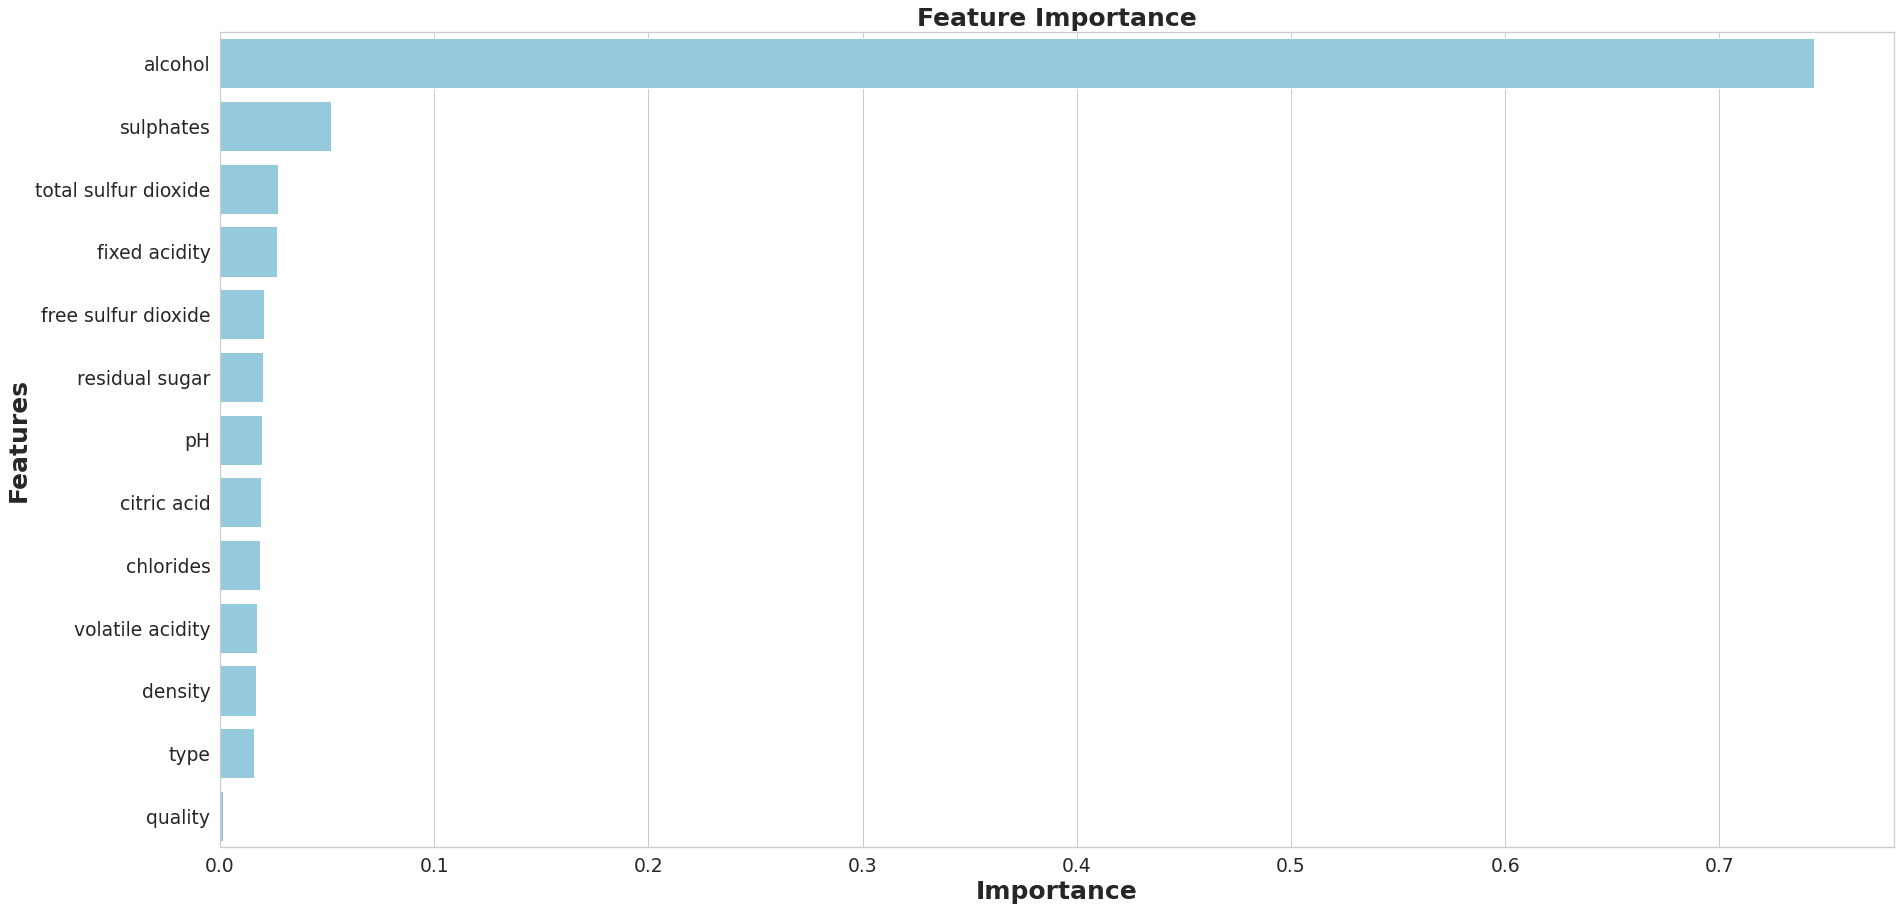

None

,Features,Gini-Importance
0,alcohol,0.744234
1,sulphates,0.051668
2,total sulfur dioxide,0.027262
3,fixed acidity,0.026709
4,free sulfur dioxide,0.020427
5,residual sugar,0.019876
6,pH,0.019543
7,citric acid,0.019222
8,chlorides,0.018898
9,volatile acidity,0.017313


In [91]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

[Text(167.40000000000003, 190.26, 'X[11] <= 5.5\ngini = 0.672\nsamples = 5569\nvalue = [25, 184, 1814, 2430, 950, 161, 5]'),
 Text(100.44000000000001, 135.9, 'X[11] <= 4.5\ngini = 0.188\nsamples = 2023\nvalue = [25, 184, 1814, 0, 0, 0, 0]'),
 Text(66.96000000000001, 81.53999999999999, 'X[11] <= 3.5\ngini = 0.211\nsamples = 209\nvalue = [25, 184, 0, 0, 0, 0, 0]'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0, 0, 0, 0]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 184\nvalue = [0, 184, 0, 0, 0, 0, 0]'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 1814\nvalue = [0, 0, 1814, 0, 0, 0, 0]'),
 Text(234.36, 135.9, 'X[11] <= 6.5\ngini = 0.457\nsamples = 3546\nvalue = [0, 0, 0, 2430, 950, 161, 5]'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2430\nvalue = [0, 0, 0, 2430, 0, 0, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'X[11] <= 7.5\ngini = 0.255\nsamples = 1116\nva

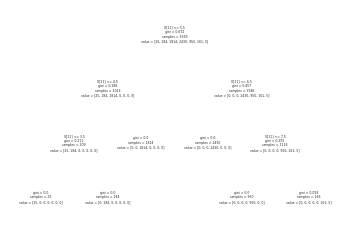

In [34]:
plot_tree(dtc)